Reading netCDF files of SLR for Antarica

In [3]:
using MimiCIAM
using Mimi
using Plots
using NetCDF

In [7]:
ncinfo("C:/Users/krfek/Downloads/gitdemo/mimiCIAM_demo/SLR_Manip/ssp126_antnet.nc")


##### NetCDF File #####

C:\Users\krfek\Downloads\gitdemo\mimiCIAM_demo\SLR_Manip\ssp126_antnet.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
time                                                94                        
realization                                         20000                     

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
time                            DOUBLE          time                            
climate                         INT             realization                     
antnet                          FLOAT           time realization                
realization                     INT             realization                     

##### Attributes #####

Variable            Na

In [3]:
#ncinfo("C:/Users/krfek/Downloads/gitdemo/mimiCIAM_demo/SLR_Manip/ssp126_antnet.nc")
ant_126 = ncread("ssp126_antnet.nc", "antnet")
m1_ant_126 = ant_126[:, 1:20]
ant_245 = ncread("ssp245_antnet.nc", "antnet")
m1_ant_245 = ant_245[:, 1:20]
ant_585 = ncread("ssp585_antnet.nc", "antnet")
m1_ant_585 = ant_585[:, 1:20]



94×20 Matrix{Float32}:
 0.00288097   0.00258667  0.00294909  …  0.00286254  0.00279551  0.0030042
 0.0033003    0.00270598  0.00338618     0.00316981  0.00316183  0.00351624
 0.00370105   0.00277149  0.00382946     0.00344232  0.00355413  0.00403026
 0.00412442   0.00281444  0.00430676     0.00374279  0.00390684  0.00456228
 0.00452682   0.00286465  0.00483619     0.00404862  0.00426101  0.00510905
 0.00491877   0.0028921   0.00536694  …  0.00433074  0.00463268  0.00566726
 0.00529771   0.00290663  0.00589165     0.00465328  0.00497954  0.00625851
 0.00573764   0.0028822   0.00644786     0.00495065  0.00526917  0.00685647
 0.00614978   0.00285343  0.00704099     0.00519994  0.00552085  0.00746624
 0.00655308   0.00281599  0.00762463     0.00554374  0.00575228  0.00808319
 0.00696162   0.00282407  0.00821435  …  0.00593836  0.00600347  0.00871683
 0.00738817   0.00275186  0.00886346     0.0062935   0.00629176  0.00939153
 0.00778301   0.00265222  0.00956833     0.00664914  0.00661576  0

histogram of SLR data from nc files (ignore these, just tests)

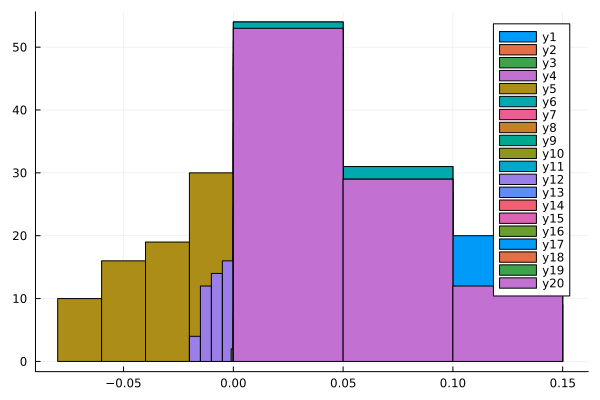

In [4]:
histogram(m1_ant_126)

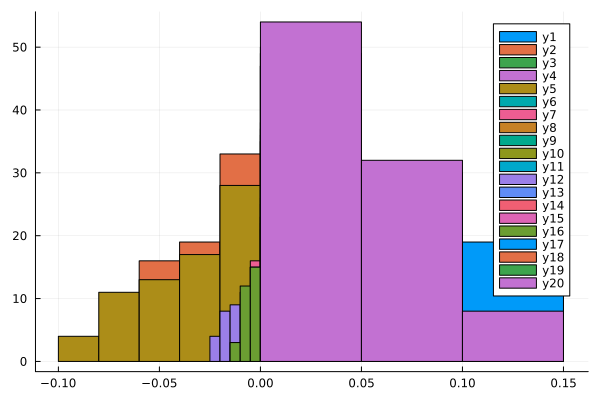

In [5]:
histogram(m1_ant_245)

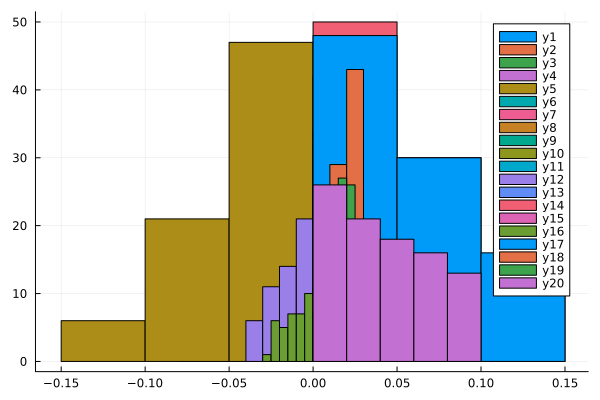

In [6]:
histogram(m1_ant_585)

functions to find time in file

In [16]:
time = ncread("ssp126_antnet.nc", "time")
println(time[1])
function calculate_year(x)
    1850 + (x/360)
end
years = calculate_year.(time)
println(years[1])
function year_to_time(x)
    360(x-1850)
end
    



56520.0
2007.0


year_to_time (generic function with 1 method)

get the data from a specific year and ssp/rcp combo

In [27]:

findall(x -> x==56520, time)
function find_year_ssp(year, ssp)
    if (ssp == 126)
        ant_126[findall(x -> x == year_to_time(year), time)[1], :]
    elseif (ssp == 245)
        ant_245[findall(x -> x == year_to_time(year), time)[1], :]
    elseif (ssp == 585)
        ant_585[findall(x -> x == year_to_time(year), time)[1], :]
    else 
        error
    end
end

find_year_ssp(2007, 126)

20000-element Vector{Float32}:
 0.0028809742
 0.0025866712
 0.0029490942
 0.0027128516
 0.0026237892
 0.0029824139
 0.0027605484
 0.0028027706
 0.0028784613
 0.0028261559
 0.0027577947
 0.002671
 0.0027826936
 ⋮
 0.0029422024
 0.002596744
 0.002928033
 0.00264246
 0.0028455346
 0.0031027936
 0.003052105
 0.0030628117
 0.0027180717
 0.0029974456
 0.002687272
 0.0029081344

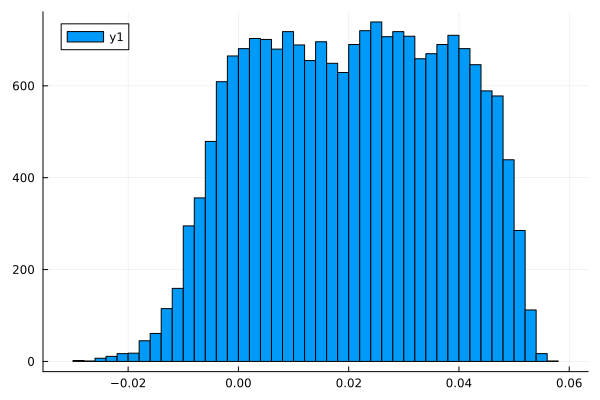

In [28]:
histogram(find_year_ssp(2050, 126))

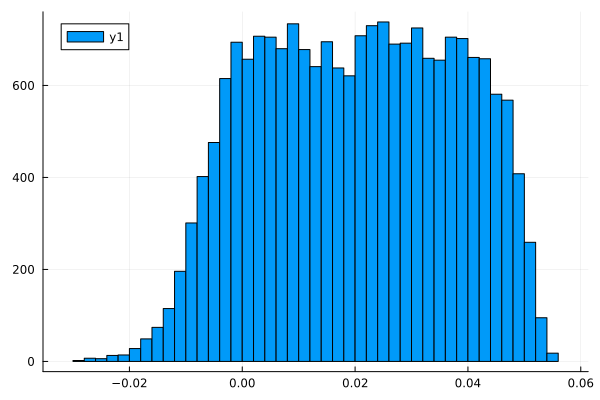

In [29]:
histogram(find_year_ssp(2050, 245))

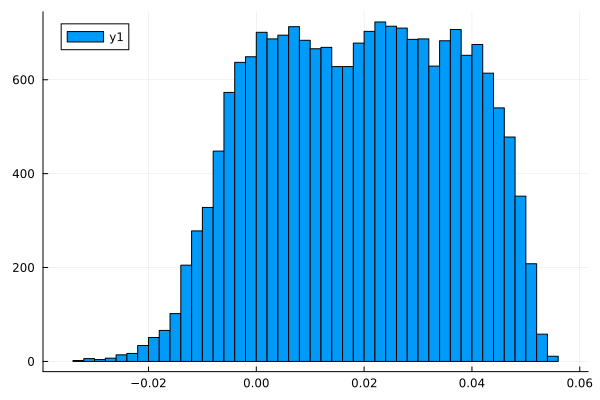

In [30]:
histogram(find_year_ssp(2050, 585))

Reading Herman's et al netcdf file projections for brick components

In [10]:
ais_126 = ncread("cmip6_mc_projections_im/ssp126_antnet.nc", "antnet")
ais_245 = ncread("cmip6_mc_projections_im/ssp245_antnet.nc", "antnet")
ais_585 = ncread("cmip6_mc_projections_im/ssp585_antnet.nc", "antnet")

gsic_126 = ncread("cmip6_mc_projections_im/ssp126_glacier.nc", "glacier")
gsic_245 = ncread("cmip6_mc_projections_im/ssp245_glacier.nc", "glacier")
gsic_585 = ncread("cmip6_mc_projections_im/ssp585_glacier.nc", "glacier")

gis_126 = ncread("cmip6_mc_projections_im/ssp126_greennet.nc", "greennet")
gis_245 = ncread("cmip6_mc_projections_im/ssp245_greennet.nc", "greennet")
gis_585 = ncread("cmip6_mc_projections_im/ssp585_greennet.nc", "greennet")

te_126 = ncread("cmip6_mc_projections_im/ssp126_expansion.nc", "expansion")
te_245 = ncread("cmip6_mc_projections_im/ssp245_expansion.nc", "expansion")
te_585 = ncread("cmip6_mc_projections_im/ssp585_expansion.nc", "expansion")

lws_126 = ncread("cmip6_mc_projections/ssp126_landwater_mid.nc", "landwater")
lws_245 = ncread("cmip6_mc_projections/ssp245_landwater_mid.nc", "landwater")
lws_585 = ncread("cmip6_mc_projections/ssp585_landwater_mid.nc", "landwater")

gmsl_126 = ncread("cmip6_mc_projections_im/ssp126_GMSLR.nc", "GMSLR")
gmsl_245 = ncread("cmip6_mc_projections_im/ssp245_GMSLR.nc", "GMSLR")
gmsl_585 = ncread("cmip6_mc_projections_im/ssp585_GMSLR.nc", "GMSLR")



94×20000 Matrix{Float32}:
 0.0287935  0.0290415  0.0372972  …  0.0218569  0.0212098  0.030094
 0.0325747  0.0332911  0.0428152     0.0275176  0.0219999  0.0330481
 0.037206   0.0383358  0.0478588     0.0321346  0.0254334  0.0365865
 0.041246   0.0425981  0.0523668     0.0348477  0.0296008  0.0403164
 0.0458273  0.0463139  0.0566619     0.0378126  0.0326885  0.0441814
 0.049896   0.0501947  0.0614387  …  0.0412896  0.0364918  0.0483008
 0.0540576  0.054313   0.0660631     0.0450937  0.0415713  0.0526095
 0.0588202  0.0591856  0.0703256     0.0492573  0.0456047  0.0568954
 0.064722   0.0636004  0.0751518     0.0513222  0.0479223  0.0611732
 0.0698843  0.0672527  0.0787035     0.0533451  0.049647   0.0653631
 0.0749773  0.0718403  0.0813982  …  0.0578149  0.0512692  0.0694636
 0.0805283  0.0773485  0.0850957     0.062848   0.0527632  0.0737191
 0.0861005  0.0818984  0.0894336     0.0673055  0.0546616  0.0781262
 ⋮                                ⋱                        
 0.807095   0.6291